In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
import os
os.chdir("D:\\potato_disease_prediction")

In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


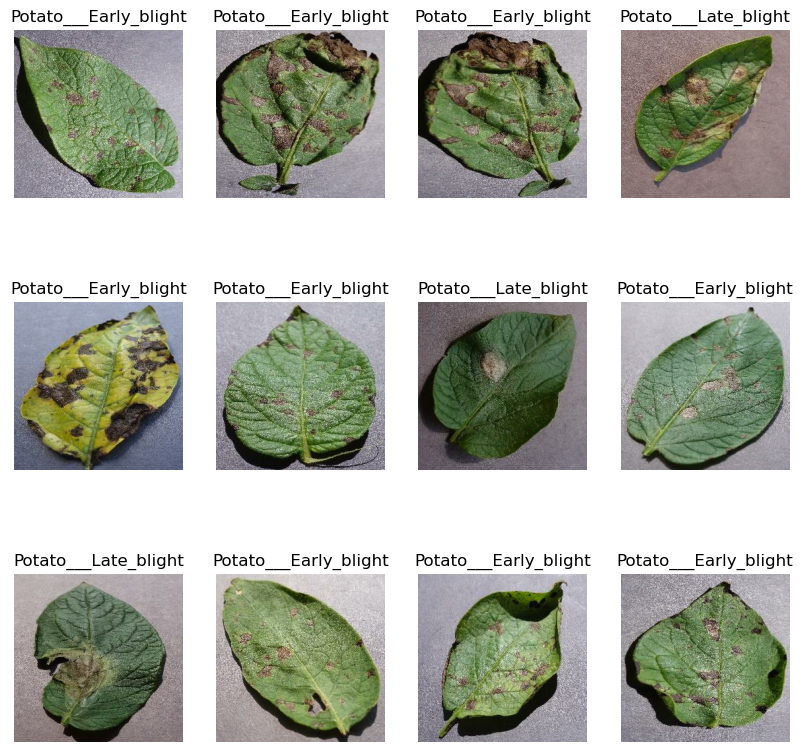

In [11]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [12]:
len(dataset)


train_size = 0.8
len(dataset)*train_size

train_ds = dataset.take(54)
len(train_ds)

test_ds = dataset.skip(54)
len(test_ds)

val_size=0.1
len(dataset)*val_size

val_ds = test_ds.take(6)
len(val_ds)

test_ds = test_ds.skip(6)
len(test_ds)

8

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 224  # or whatever size you need

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [27]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [29]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Parameters
IMAGE_SIZE = 224  # or whatever size you need
CHANNELS = 3
BATCH_SIZE = 32
n_classes = 3

# Define the resize and rescale layers
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [33]:
# Build the model
model = models.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Specify input shape here
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# Print the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,331 (2.61 MB)

 Trainable params: 683,331 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    'D:\\Rithvik\\potato-disease-classification-main\\potato-disease-classification-main\\training\\model_checkpoint.weights.h5',
    save_weights_only=True,
    save_best_only=False,
    verbose=1
)

In [37]:
import os

# Define the filename
filename = 'model_checkpoint.weights.h5'

# Get the current working directory
current_directory = os.getcwd()

# Define the full path
full_path = os.path.join(current_directory, filename)

print(full_path)

D:\potato_disease_prediction\model_checkpoint.weights.h5


In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
    callbacks=[checkpoint_cb]
)

In [ ]:
model.save("D:\\potato_disease_prediction\\model_checkpoint.weights.h5")

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    'D:\\Rithvik\\potato-disease-classification-main\\potato-disease-classification-main\\training\\model_checkpoint.weights.h5',
    save_weights_only=True,
    save_best_only=False,
    verbose=1
)

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
    callbacks=[checkpoint_cb]
)

model.save("D:\\potato_disease_prediction\\model_checkpoint.weights.h5")

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    'D:\\Rithvik\\potato-disease-classification-main\\potato-disease-classification-main\\training\\model_checkpoint.weights.h5',
    save_weights_only=True,
    save_best_only=False,
    verbose=1
)

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
    callbacks=[checkpoint_cb]
)

model.export(r"D:\Rithvik\potato-disease-classification-main\potato-disease-classification-main\models")

model.save(r"D:\Rithvik\potato-disease-classification-main\potato-disease-classification-main\models\model1.keras")

In [39]:
model = tf.keras.models.load_model(r"D:\Rithvik\potato-disease-classification-main\potato-disease-classification-main\models\1/model1.h5")

In [41]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - accuracy: 0.9927 - loss: 0.0958


In [43]:
scores

[0.09990204125642776, 0.9921875]

In [45]:
disease_actions = {
    "Potato___Late_blight": {
        "preventive": [
            "Plant disease-resistant crop varieties.",
            "Rotate crops to prevent pathogen buildup.",
            "Avoid overhead irrigation to reduce moisture on leaves."
        ],
        "treatment": [
            "Apply fungicides such as copper-based products.",
            "Remove infected plants to prevent the disease from spreading.",
            "Maintain good air circulation by proper plant spacing."
        ]
    },
    "Potato___Early_blight": {
        "preventive":[
            "Use disease-resistant varieties (e.g., ‘Russet Burbank’).",
            "Rotate crops (avoid planting potatoes in the same field for 2-3 years).",
            "Use drip irrigation to keep foliage dry and water early in the day.",
            "Ensure proper plant spacing to improve air circulation.",
            "Apply mulch to reduce soil splashing and retain moisture.",
            "Remove and destroy crop debris after harvest.",
            "Apply preventive fungicides (e.g., copper-based) as needed.",
            "Avoid over-fertilization with nitrogen; use balanced fertilizers.",
        ],
        "treatment": [
            "Apply fungicides (e.g., copper-based, chlorothalonil, or mancozeb) at the first sign of infection.",
            "Remove infected plant parts to prevent further spread.",
            "Improve air circulation by pruning overcrowded plants.",
            "Rotate fungicides to prevent resistance buildup in the fungus.",
            "Maintain proper irrigation (avoid overhead watering) to minimize moisture on leaves.",
        ]
    }
} 

first image to predict
Actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Predicted label: Potato___Late_blight
Preventive Measures:
- Plant disease-resistant crop varieties.
- Rotate crops to prevent pathogen buildup.
- Avoid overhead irrigation to reduce moisture on leaves.

Treatment Recommendations:
- Apply fungicides such as copper-based products.
- Remove infected plants to prevent the disease from spreading.
- Maintain good air circulation by proper plant spacing.


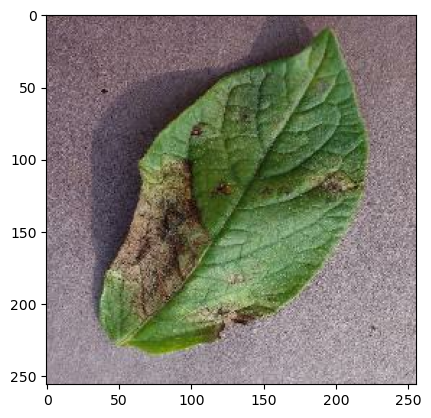

In [47]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

    predicted_class_index = np.argmax(batch_prediction[0])

    predicted_class_label = class_names[predicted_class_index]

    if predicted_class_label in disease_actions:
        preventive_measures = disease_actions[predicted_class_label]['preventive']
        treatment_recommendations = disease_actions[predicted_class_label]['treatment']
    
        print("Preventive Measures:")
        for measure in preventive_measures:
            print(f"- {measure}")

        print("\nTreatment Recommendations:")
        for treatment in treatment_recommendations:
            print(f"- {treatment}")
    else:
        print(f"No recommendations available for {predicted_class_label}.")

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


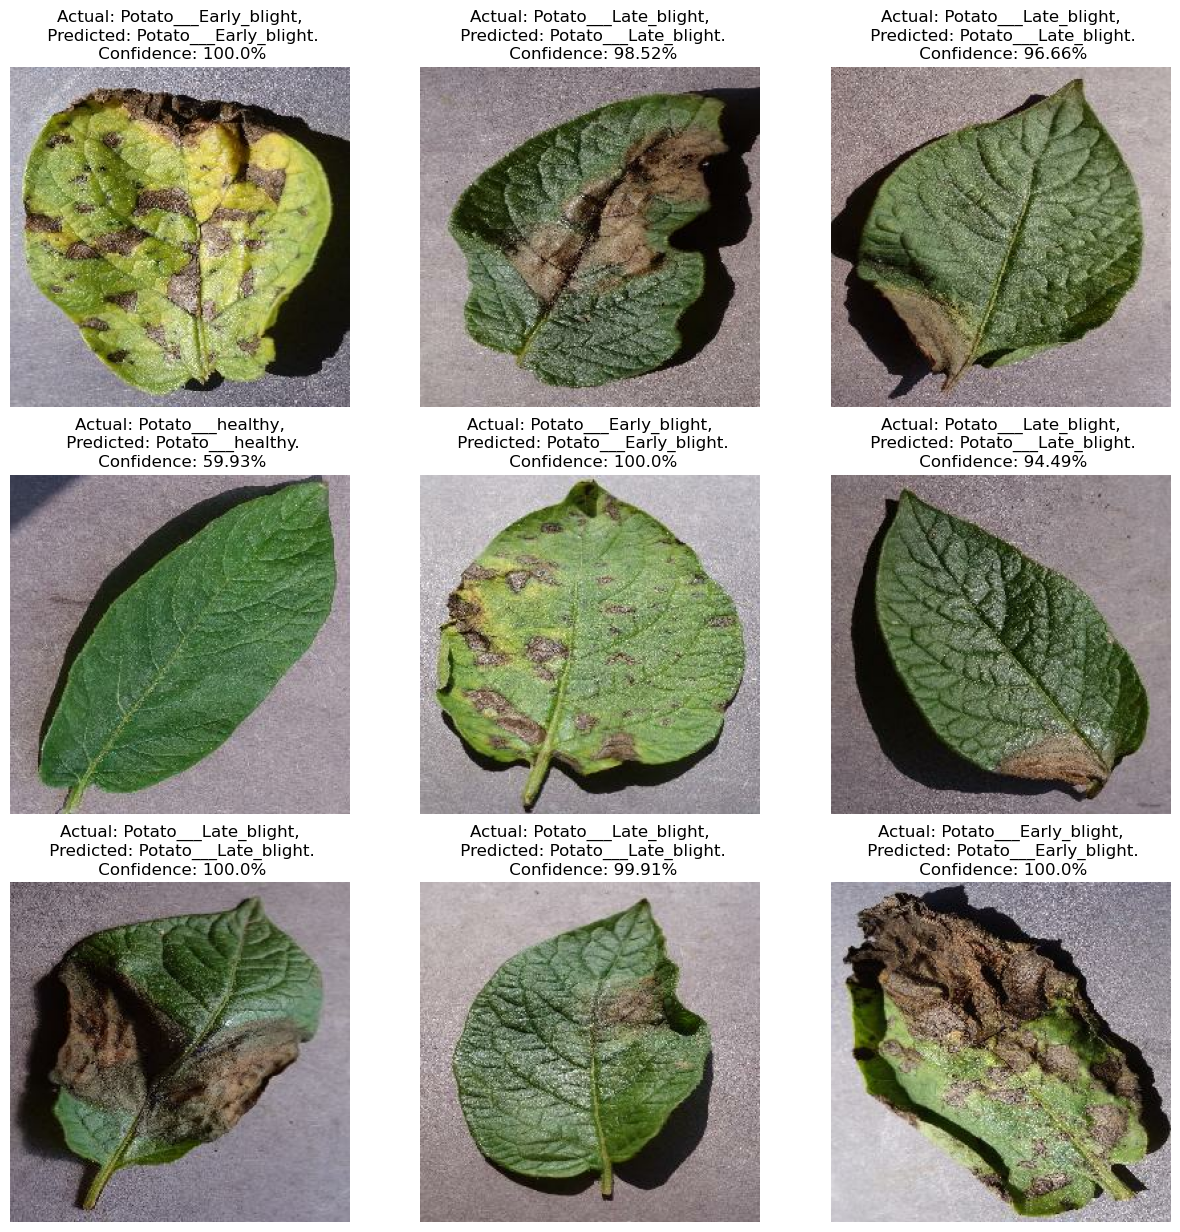

In [51]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

## -------------------- THE END --------------------